In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [50]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.mnist.load_data()

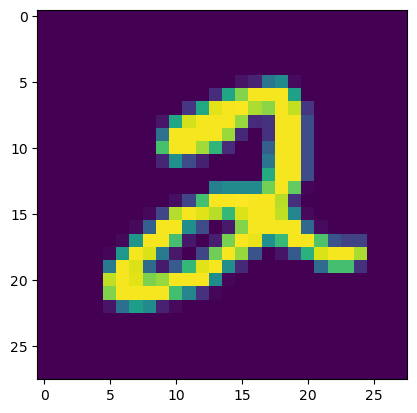

In [51]:

plt.imshow(train_images[5])

In [52]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [54]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [56]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [57]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 [==============================] - 30s 30ms/step - loss: 0.1728 - accuracy: 0.9480 - val_loss: 0.0574 - val_accuracy: 0.9815
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0494 - accuracy: 0.9852 - val_loss: 0.0329 - val_accuracy: 0.9894
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0266 - val_accuracy: 0.9915
Epoch 4/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0274 - val_accuracy: 0.9914
Epoch 5/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0312 - val_accuracy: 0.9902


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100}%')

313/313 [==============================] - 2s 6ms/step - loss: 0.0797 - accuracy: 0.9736
Test accuracy: 97.35999703407288%


313/313 [==============================] - 2s 6ms/step


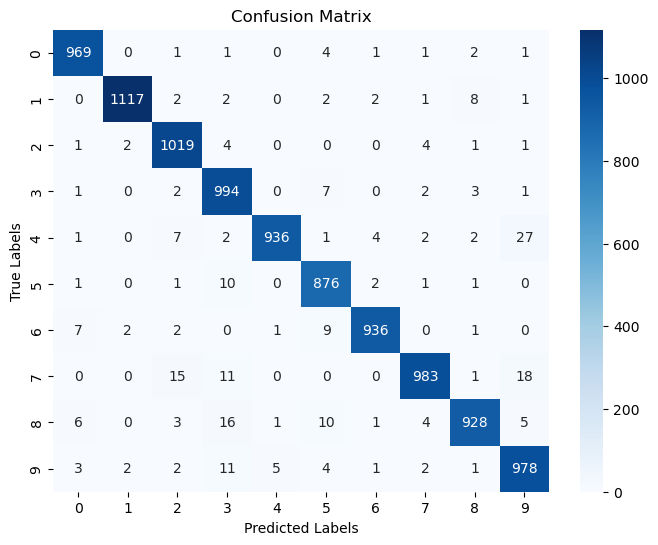

In [21]:


# Predict labels on the test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# True labels (ground truth) for the test data
true_labels = np.argmax(test_labels, axis=1)

# Generate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)



# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




In [25]:

classification_rep = classification_report(true_labels, predicted_labels)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.95      0.98      0.96      1010
           4       0.99      0.95      0.97       982
           5       0.96      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



313/313 [==============================] - 2s 6ms/step


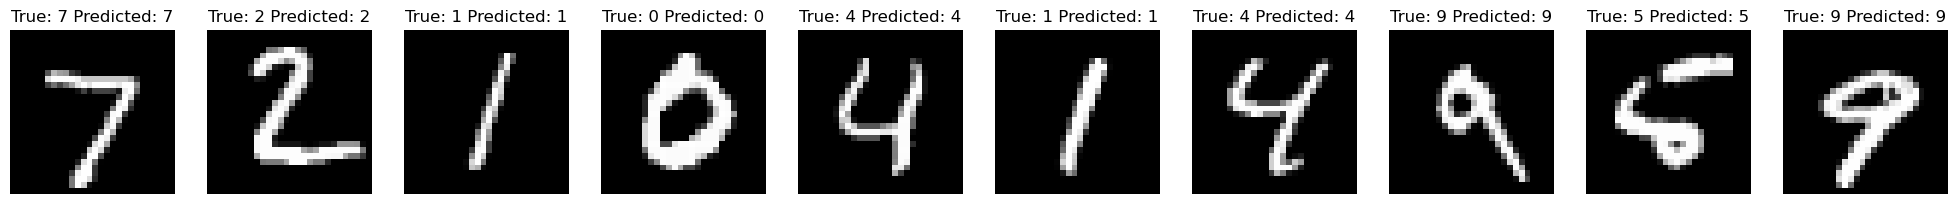

In [42]:

# Predict labels on the test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# True labels (ground truth) for the test data
true_labels = np.argmax(test_labels, axis=1)

# Find correctly classified images
correctly_classified_indices = np.where(predicted_labels == true_labels)[0]

# Number of correctly classified images to display
num_correctly_classified_to_display = 10

# Initialize a figure for displaying images in a horizontal line
fig, axes = plt.subplots(1, num_correctly_classified_to_display, figsize=(25, 15))

for i in range(min(num_correctly_classified_to_display, len(correctly_classified_indices))):
    index = correctly_classified_indices[i]
    ax = axes[i]
    ax.imshow(test_images[index].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {true_labels[index]} Predicted: {predicted_labels[index]}')
    ax.axis('off')

plt.show()


313/313 [==============================] - 2s 6ms/step


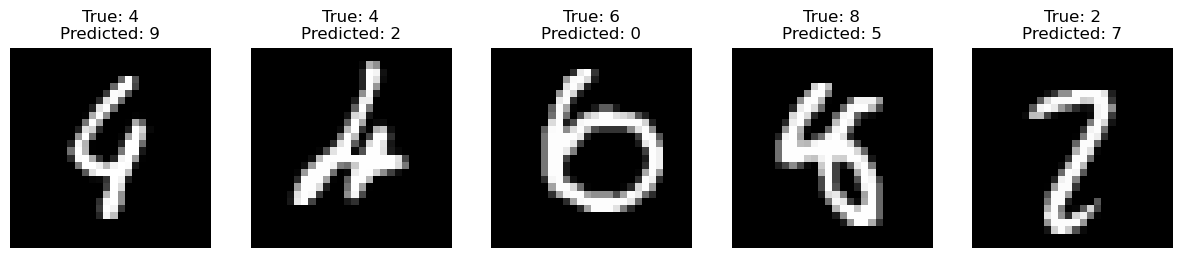

In [43]:

# Predict labels on the test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# True labels (ground truth) for the test data
true_labels = np.argmax(test_labels, axis=1)

# Find misclassified images
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# Number of misclassified images to display in a horizontal line
num_misclassified_to_display = 5

fig, axes = plt.subplots(1, num_misclassified_to_display, figsize=(15, 3))

for i in range(num_misclassified_to_display):
    index = misclassified_indices[i]
    axes[i].imshow(test_images[index].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'True: {true_labels[index]}\nPredicted: {predicted_labels[index]}')
    axes[i].axis('off')

plt.show()


In [99]:
import cv2
from PIL import Image
img = cv2.imread('/kaggle/input/final8/81.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [100]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [101]:

encode = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}



1/1 [==============================] - 0s 24ms/step


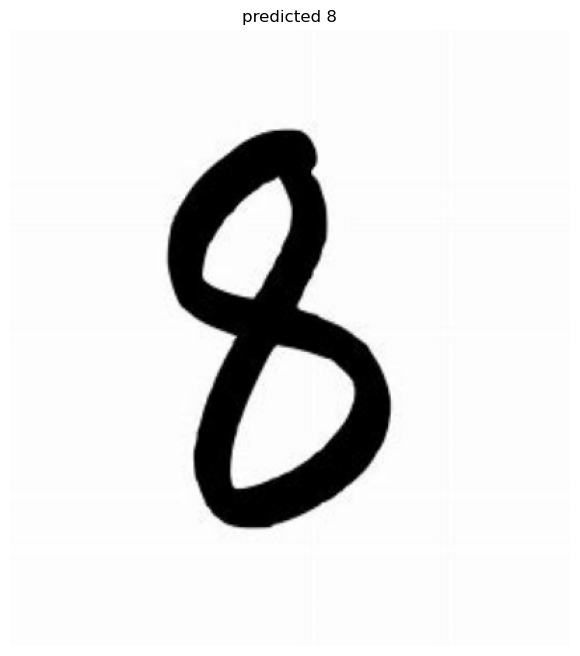

In [102]:
mg_pred = encode[np.argmax(model.predict(img_final))]

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f'predicted {mg_pred}')
plt.axis('off')  # Turn off axis
plt.show()

1/1 [==============================] - 0s 24ms/step


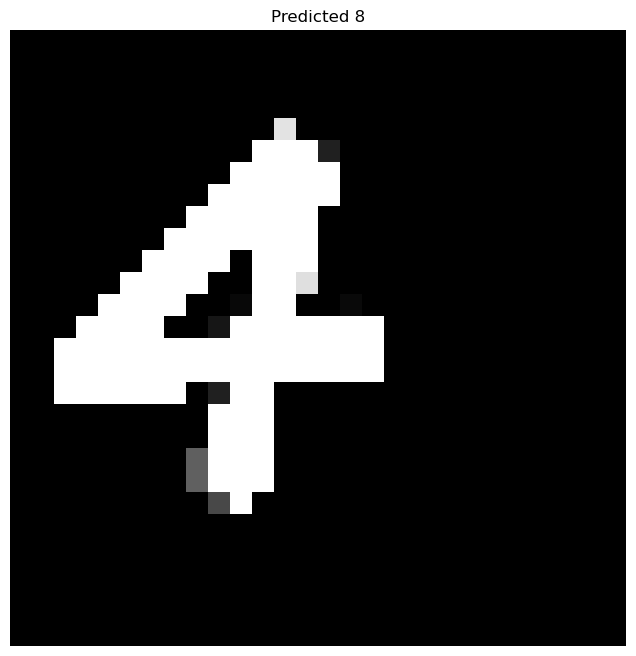